In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [216]:
NYSE_Weather = pd.read_csv('../data/NYSE_Weather.csv')
NYC_no_outliers = pd.read_csv('../data/NYC_no_outliers.csv')
Monthly_NYC = pd.read_csv('../data/Monthly_averages.csv')

In [217]:
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,sunrise,sunset,conditions,description
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,none,0.0,26.2,100.0,25.2,07:20:26,16:41:08,Overcast,Cloudy skies throughout the day.
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,"rain,snow",0.0,23.0,99.1,18.9,07:20:26,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,none,0.0,22.1,99.3,13.3,07:20:15,16:44:54,Overcast,Cloudy skies throughout the day.
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,none,0.0,46.8,32.1,29.5,07:20:07,16:45:53,Partially cloudy,Partly cloudy throughout the day.
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,none,0.0,40.8,0.9,34.5,07:19:56,16:46:55,Clear,Clear conditions throughout the day.


In [218]:
#One-Hot Encode the conditions column

# one-hot encoding each individual condition in a seprate dataframe which will then be added to the original
one_hot_encoded_data = pd.DataFrame()

# Split the combined condition into a list of individual conditions
conditions = NYSE_Weather['conditions'].str.split(', ')

for index, condition_list in enumerate(conditions):
    for condition in condition_list:
        # Create binary columns for each condition
        one_hot_encoded_data.at[index, condition.strip()] = 1

# Fill NaN values with 0
one_hot_encoded_data = one_hot_encoded_data.fillna(0).astype(int)

# Concatenate the one-hot encoded data with original NYSE_Weather df
NYSE_Weather = pd.concat([NYSE_Weather, one_hot_encoded_data], axis=1)
NYSE_Weather = NYSE_Weather.drop('conditions', axis=1)


In [219]:
NYSE_Weather.head()


,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,...,sunrise,sunset,description,Overcast,Snow,Rain,Partially cloudy,Clear,Freezing Drizzle/Freezing Rain,Ice
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,...,07:20:26,16:41:08,Cloudy skies throughout the day.,1,0,0,0,0,0,0
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,...,07:20:26,16:42:02,Cloudy skies throughout the day with late afte...,1,1,1,0,0,0,0
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,...,07:20:15,16:44:54,Cloudy skies throughout the day.,1,0,0,0,0,0,0
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,...,07:20:07,16:45:53,Partly cloudy throughout the day.,0,0,0,1,0,0,0
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,...,07:19:56,16:46:55,Clear conditions throughout the day.,0,0,0,0,1,0,0


### Linear Regression (Monthly Returns vs Sunlight Hours)

In [220]:
Monthly_NYC.head()

,Avg_Returns,Avg_Returns_N/O,Hours_of_Sunlight(Time),Hours_of_Sunlight(Numeric)
0,0.042002,0.087407,0 days 09:39:17.951371571,9.654986
1,0.019312,0.089709,0 days 10:39:37.815261044,10.660504
2,0.042535,0.076085,0 days 11:57:43.722482435,11.962145
3,0.081893,0.068025,0 days 13:19:36.336645962,13.326760
4,0.043694,0.039235,0 days 14:26:51.105454545,14.447529


In [221]:
import statsmodels.api as sm
y = Monthly_NYC['Avg_Returns_N/O']
x= Monthly_NYC['Hours_of_Sunlight(Numeric)']

x = sm.add_constant(x) #adds a constant/intercept for the regression

model = sm.OLS(y, x)
regression = model.fit()

In [222]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Returns_N/O   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     6.463
Date:                Fri, 01 Dec 2023   Prob (F-statistic):             0.0293
Time:                        00:26:35   Log-Likelihood:                 28.333
No. Observations:                  12   AIC:                            -52.67
Df Residuals:                      10   BIC:                            -51.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

c:\Users\l3onw\anaconda3\envs\LHL_env\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: xlabel='Hours_of_Sunlight(Numeric)', ylabel='Avg_Returns_N/O'>

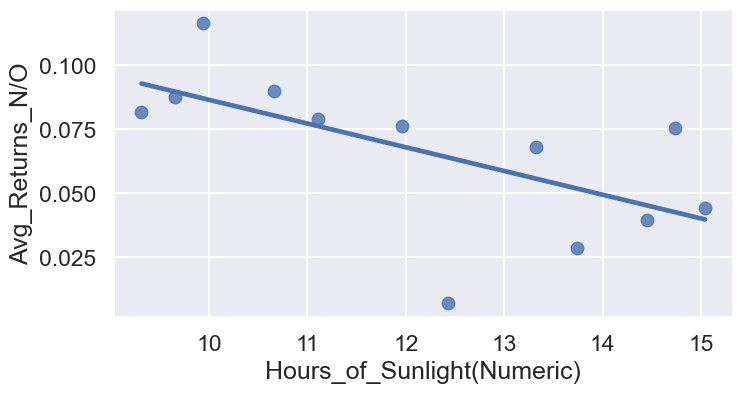

In [223]:
sns.set_theme(style = 'darkgrid', context = 'talk')

plt.figure(figsize=(8,4))
sns.regplot(x=Monthly_NYC['Hours_of_Sunlight(Numeric)'], y = Monthly_NYC['Avg_Returns_N/O'], ci=None)

- Negative relationship between average monthly returns and hours of sunlight 
- investors require higher returns when SAD is in effect
- EXPAND FURTHER

<Axes: ylabel='Count'>

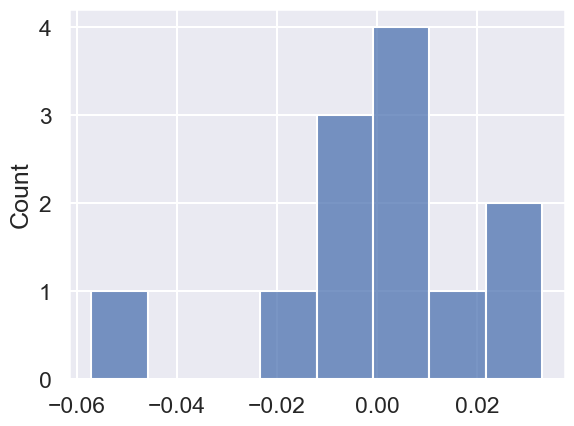

In [224]:
#check distribution of residuals
residuals = regression.resid

sns.histplot(residuals, bins = 8)

### Kmeans Clustering

Cluster different days based on weather conditions to distinguish which types of days have what type of impact on market returns

In [225]:
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,...,sunrise,sunset,description,Overcast,Snow,Rain,Partially cloudy,Clear,Freezing Drizzle/Freezing Rain,Ice
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,...,07:20:26,16:41:08,Cloudy skies throughout the day.,1,0,0,0,0,0,0
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,...,07:20:26,16:42:02,Cloudy skies throughout the day with late afte...,1,1,1,0,0,0,0
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,...,07:20:15,16:44:54,Cloudy skies throughout the day.,1,0,0,0,0,0,0
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,...,07:20:07,16:45:53,Partly cloudy throughout the day.,0,0,0,1,0,0,0
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,...,07:19:56,16:46:55,Clear conditions throughout the day.,0,0,0,0,1,0,0


In [226]:
# Create seperate dataframe with only the numeric weather columns
"""seeing how the it clusters the weather data"""
#HOS_Numeric temp precip humidity windspeed	cloudcover	visibility

Weather_kmeans = NYSE_Weather[['HOS_Numeric','temp','precip','humidity','windspeed','cloudcover','visibility']]
x=Weather_kmeans


Elbow Method to find optimal number of clusters

In [227]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

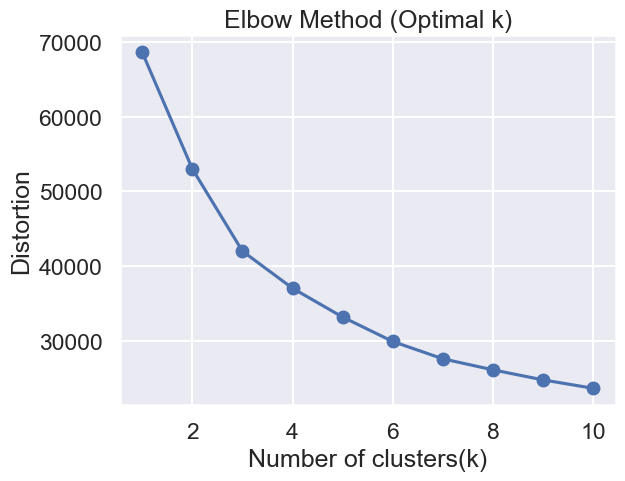

In [228]:
distortions = []

# set max number of potential clusters to 10
for k in range(1, 11): 
    km = KMeans(n_clusters= k, n_init=10, random_state=0)
    km.fit(x_scaled)
    distortions.append(km.inertia_)
        
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Optimal k)')
plt.show() 

Visible elbow at k=3

In [229]:
#initialize kmeans clustering
k = 3
kmeans = KMeans(n_clusters= k, random_state=0, n_init= 10)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [230]:
#Checking the clusters for each value
kmeans.fit_predict(x_scaled)


array([2, 2, 1, ..., 2, 2, 1])

In [231]:
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster labers to DFs
Weather_kmeans['ClusterKM'] = cluster_labels
NYSE_Weather['ClusterKM'] = cluster_labels

# Visualize the clusters using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)


C:\Users\l3onw\AppData\Local\Temp\ipykernel_11364\573801070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_kmeans['ClusterKM'] = cluster_labels


In [232]:
#number of results per cluster
Weather_kmeans['ClusterKM'].value_counts()

ClusterKM
0    3731
2    3443
1    2628
Name: count, dtype: int64

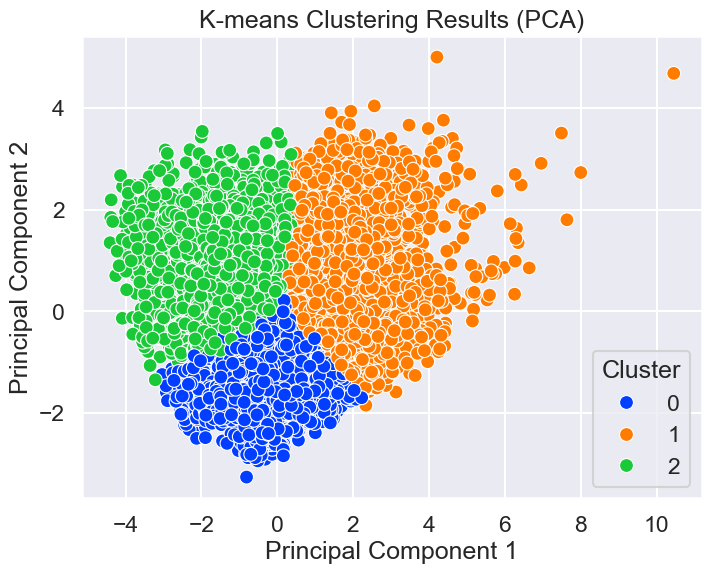

In [233]:
# Create a scatter plot of the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=cluster_labels, palette='bright', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA)')
plt.legend(title='Cluster')
plt.show()

In [234]:
#Means of each cluster, organized by features
Weather_kmeans.groupby('ClusterKM').mean()

,HOS_Numeric,temp,precip,humidity,windspeed,cloudcover,visibility
ClusterKM,,,,,,,
0,13.885708,21.466845,0.676833,60.669928,20.613535,42.338971,16.466282
1,12.022732,12.693493,9.234744,81.667314,23.860654,88.394216,11.650038
2,10.592216,4.812170,0.381511,53.677781,25.642782,44.356085,19.029712


- Cluster1 :
    - Warmer, sunnier days (more HOS)
- Cluster2 : 
    - Cloudy days, most commonly with precipitation
- Cluster3 : 
    - Cold days with fewer HOS

In [235]:
#seeing how returns vary based on clusters
NYSE_Weather.groupby('ClusterKM')['Returns'].mean()

ClusterKM
0    0.000759
1    0.029822
2    0.074166
Name: Returns, dtype: float64

- The clusters with fewer hours of sunlight showed greater on average returns
    - These cluster presumably coincide with winter/fall
- Clusters with more hours of sunlight showed significantly lower returns
    - These cluster presumably coincide with spring/summer

 - <u>Results align with Previous Findings</u>
    - Warmer days => Likely Spring/Summer => More sun => lower returns
    - Cloudier days => Less sun => higher returns  
    - Cold days => Likely Fall/Winter => Less sun => Even higher returns

In [236]:
#Perform PCA
pca =PCA()
pca.fit(x_scaled)

#Explained Variance Ratio
EVR = pca.explained_variance_ratio_

#Cumulative Variance Ratio
CVR = EVR.cumsum()

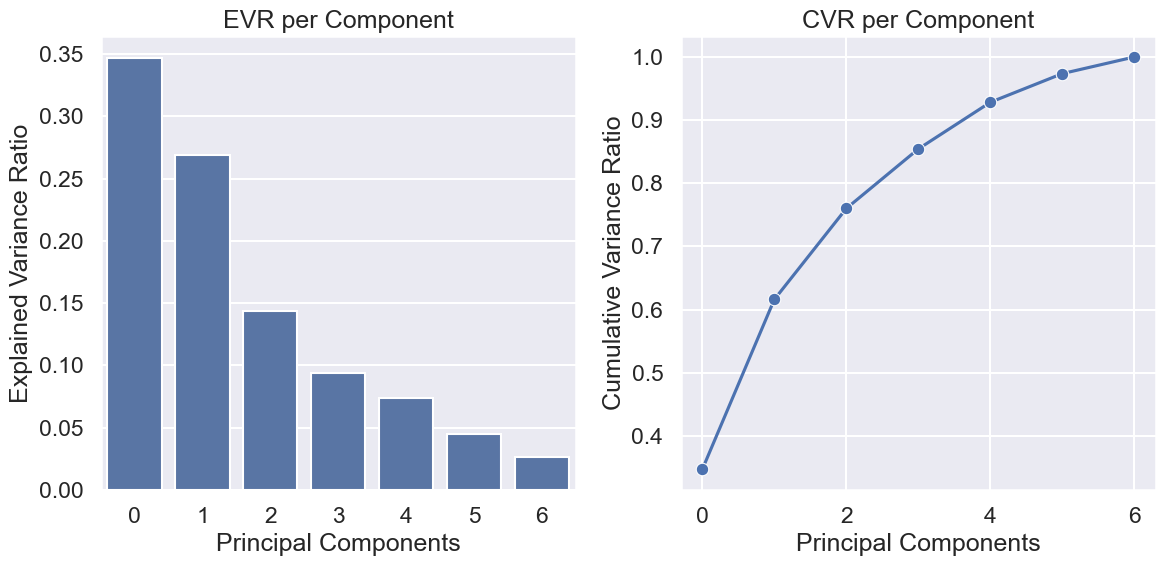

In [237]:
#plot for both explained and cumulative variance ratios
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Explained Variance Ratio
sns.barplot(EVR, ax=axes[0])
axes[0].set_title('EVR per Component')
axes[0].set_xlabel('Principal Components')
axes[0].set_ylabel('Explained Variance Ratio')

#Cumulative Variance Ratio
sns.lineplot(CVR, ax=axes[1], marker='o')
axes[1].set_title('CVR per Component')
axes[1].set_xlabel('Principal Components')
axes[1].set_ylabel('Cumulative Variance Ratio')

#clean layout
plt.tight_layout()

In [238]:
print("Explained variance with 3 PCs :", CVR[2])

Explained variance with 3 PCs : 0.7601093485158301


### Classification Model

In [249]:
#using weather variables to predict buy or sell
#essentially turning a linear regression model into a classification model (returns is the proxy for the recommendations)
def pos_neg_return(returns):
    if returns >=0:
        return "Buy/Hold"
    else:
        return "Sell"

#create seperated dataframe for classification model
Weather_SL = Weather_kmeans    

#add dummy variables for conditions
Weather_SL = pd.concat([Weather_SL, one_hot_encoded_data], axis=1)

#create column for buy/sell recommendation based on return values
Weather_SL['Recommendation'] = NYSE_Weather['Returns'].apply(pos_neg_return)

#drop cluster column/values
Weather_SL = Weather_SL.drop('ClusterKM', axis=1)

In [259]:
Weather_SL

,HOS_Numeric,temp,precip,humidity,windspeed,cloudcover,visibility,Recommendation,Overcast,Snow,Rain,Partially cloudy,Clear,Freezing Drizzle/Freezing Rain,Ice
0,9.345000,0.3,0.000,54.6,26.2,100.0,25.2,Sell,1,0,0,0,0,0,0
1,9.360000,-1.1,1.247,58.1,23.0,99.1,18.9,Sell,1,1,1,0,0,0,0
2,9.410833,2.9,0.000,78.3,22.1,99.3,13.3,Buy/Hold,1,0,0,0,0,0,0
3,9.429444,-1.5,0.000,57.0,46.8,32.1,29.5,Sell,0,0,0,1,0,0,0
4,9.449722,-7.9,0.000,51.4,40.8,0.9,34.5,Buy/Hold,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,9.891944,12.9,0.000,57.7,17.8,0.7,16.0,Sell,0,0,0,0,1,0,0
9798,9.859167,14.8,0.000,69.1,14.7,2.3,16.0,Buy/Hold,0,0,0,0,1,0,0
9799,9.765556,6.4,0.000,47.7,22.9,1.6,16.0,Buy/Hold,0,0,0,0,1,0,0
9800,9.735556,6.5,1.073,70.8,28.4,47.7,15.2,Sell,0,0,1,1,0,0,0


In [251]:
#splitting training and test data
x = Weather_SL.drop('Recommendation', axis=1)
y = Weather_SL['Recommendation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [260]:
#creating a random forest model
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

#prediction values for testing data
RF_predict = RF_model.predict(x_test)

In [243]:
# create a function to generate the evaluation metrics
def eval_metrics(model, predict, y_true):
    accuracy = accuracy_score(y_true, predict)
    precision = precision_score(y_true, predict, pos_label='Buy/Hold')
    recall = recall_score(y_true, predict, pos_label='Buy/Hold')
    f1 = f1_score(y_true, predict, pos_label='Buy/Hold')
    roc_auc = roc_auc_score(y_true, model.predict_proba(x_test)[:, 1])
    
    return accuracy, precision, recall, f1, roc_auc

In [261]:
#Display metrics for random forest model
RF_metrics = eval_metrics(RF_model, RF_predict, y_test)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metrics in enumerate(metrics_names):
    print(f'{metrics_names[i]}: {RF_metrics[i]}')

Accuracy: 0.5339112697603263
Precision: 0.5626515763945028
Recall: 0.6510757717492984
F1-Score: 0.6036426712922809
ROC-AUC: 0.5178847839857039


Text(56.98958333333332, 0.5, 'True Label')

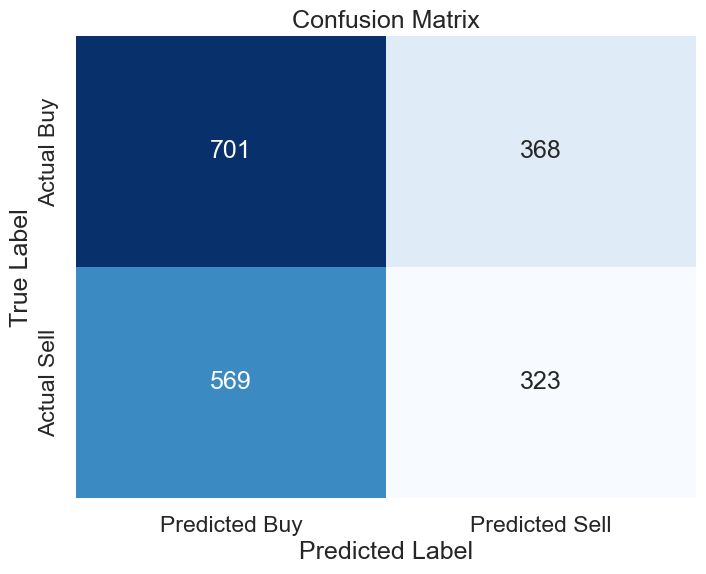

In [258]:
conf_matrix = confusion_matrix(y_test, RF_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Buy', 'Predicted Sell'],
            yticklabels=['Actual Buy', 'Actual Sell'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')